<a href="https://colab.research.google.com/github/praneethk002/100-Days-of-Code/blob/Day1/Praneeth_PES2UG20CS251.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df.head()

,ID,YEAR,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,PS,WS10M,QV2M,T2M,VACATION_RATE
0,1,1982.0,-258.394286,27.582857,12.824286,71.080000,91.955714,3.695714,9.564286,18.707143,64.129614
1,2,1982.0,-258.795714,28.455714,14.098571,69.448571,91.900000,3.404286,10.124286,19.865714,42.625243
2,3,1982.0,-258.680000,28.175714,13.708571,66.217143,91.985714,4.125714,9.537143,19.915714,52.912020
3,4,1982.0,-258.800000,28.458571,14.110000,67.267143,92.038571,4.412857,10.080000,20.325714,39.419760
4,5,1982.0,-257.401429,30.037143,14.290000,61.527143,91.902857,3.227143,9.331429,21.081429,46.544332


In [5]:
df.isnull().sum()

ID               0
YEAR             0
T2M_RANGE        0
T2M_MAX          0
T2M_MIN          0
RH2M             0
PS               0
WS10M            0
QV2M             0
T2M              0
VACATION_RATE    0
dtype: int64

In [6]:
cols = df.columns

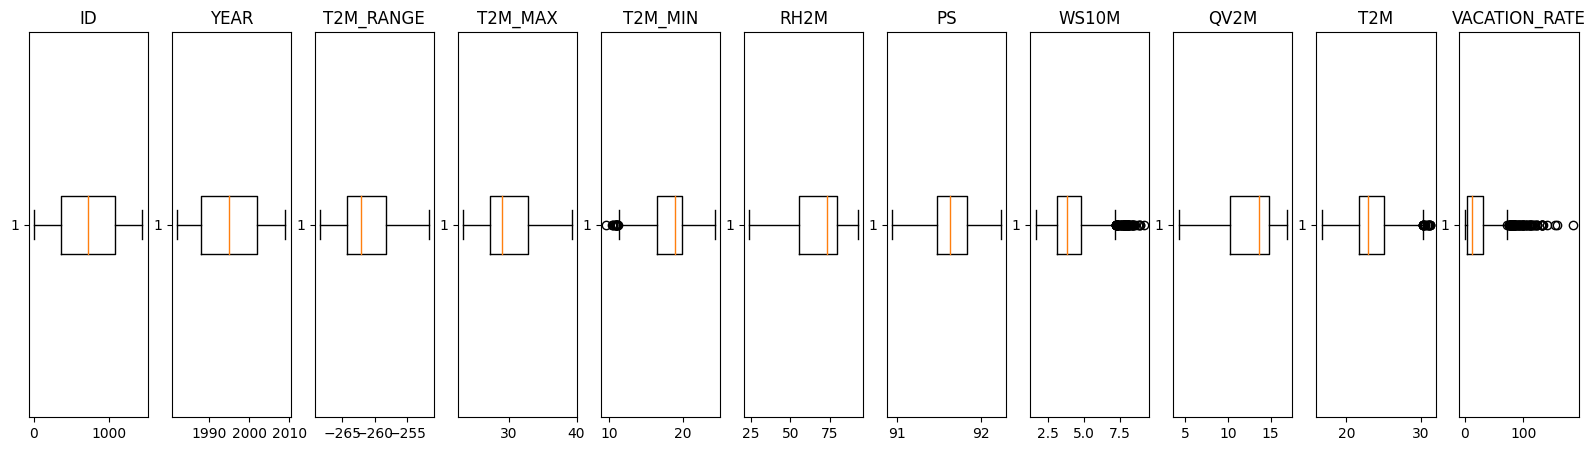

In [7]:
fig, ax = plt.subplots(ncols=len(cols), figsize=(20, 5))

for i, col in enumerate(cols):
    ax[i].boxplot(df[col], vert=False)
    ax[i].set_title(col)

plt.show()

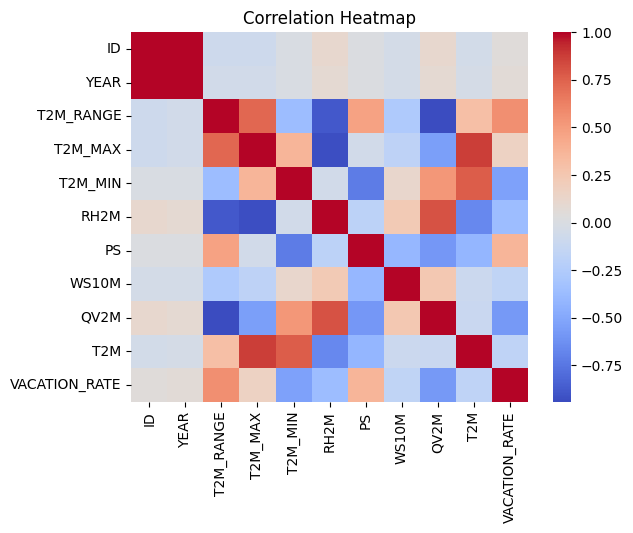

In [8]:
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df.dtypes


ID                 int64
YEAR             float64
T2M_RANGE        float64
T2M_MAX          float64
T2M_MIN          float64
RH2M             float64
PS               float64
WS10M            float64
QV2M             float64
T2M              float64
VACATION_RATE    float64
dtype: object

In [10]:
print(df.describe())


                ID         YEAR    T2M_RANGE      T2M_MAX      T2M_MIN  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000   
mean    720.000000  1995.296635  -261.260596    30.111243    18.222194   
std     415.547831     7.966192     3.706410     3.710257     2.736582   
min       1.000000  1982.000000  -268.404286    23.275714     9.612857   
25%     360.500000  1988.000000  -264.301429    27.209286    16.497143   
50%     720.000000  1995.000000  -262.135714    28.991429    18.908571   
75%    1079.500000  2002.000000  -258.300000    32.906429    19.971429   
max    1439.000000  2009.000000  -251.711429    39.278571    24.354286   

              RH2M           PS        WS10M         QV2M          T2M  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000   
mean     67.681880    91.652498     4.169290    12.564531    23.537706   
std      16.134820     0.227938     1.446876     2.826223     2.913995   
min      24.114286    90.940000     1

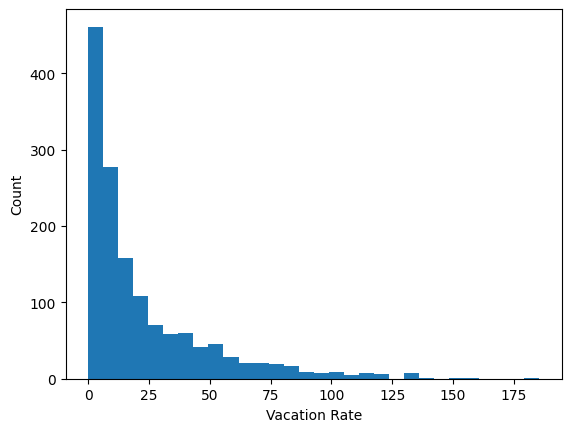

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['VACATION_RATE'], bins=30)
plt.xlabel('Vacation Rate')
plt.ylabel('Count')
plt.show()


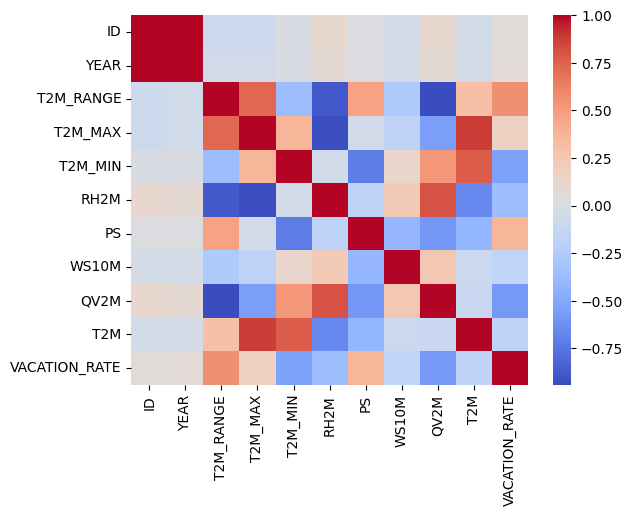

In [12]:
import seaborn as sns

sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()


In [39]:
# define the target and features
target_col = 'VACATION_RATE'
feature_cols = ['T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'RH2M', 'PS', 'RH2M']

# split the data into training and testing sets
train = df
test = df_test

# select only the relevant columns
X_train = train[feature_cols]
y_train = train[target_col]

X_test = test[feature_cols]


In [66]:
# define the target and features
import xgboost
target_col = 'VACATION_RATE'
feature_cols = ['T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'PS']

# split the data into training and testing sets
X_train = df[feature_cols]
y_train = df[target_col]

X_test = df_test[feature_cols]

# fit the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#fit2
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 0.3, 
                             learning_rate = 0.1,
                             max_depth = 6, 
                             alpha = 10, 
                             n_estimators = 1000)
xgb_model.fit(X_train, y_train)

# make predictions on the test set
y_pred1 = xgb_model.predict(X_test)

# create a submission dataframe with ID and predictions
# submission_df = pd.DataFrame({'ID': test['ID'], 'VACATION_RATE': y_pred1})
submission2_df = pd.DataFrame({'ID': df_test['ID'], 'VACATION_RATE': y_pred1})

# save the submission to a csv file
# submission_df.to_csv('submission.csv', index=False)
submission2_df.to_csv('submission2.csv', index=False)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

X_train.shape


model = Sequential()
model.add(Dense(units=10 , kernel_initializer='normal', activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(units=20, kernel_initializer='normal', activation='relu', ))
model.add(Dense(units=30, kernel_initializer='normal', activation='relu', ))
model.add(Dense(units=20, kernel_initializer='normal', activation='relu', ))

model.add(Dense(units=10, kernel_initializer='normal', activation='relu', ))
model.add(Dense(units=1, kernel_initializer='normal'))

model.summary()

from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

model.compile(loss='mean_absolute_error', optimizer=Adam())




lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.70,
                         min_lr = 1e-2)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=10)


%time
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=20, epochs=20, callbacks=[lrd, mcp])

y_pred1 = model.predict(X_test)


# XGBoost

In [34]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import xgboost as xgb
target_col = 'VACATION_RATE'
feature_cols = ['T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'RH2M', 'PS', 'RH2M']

# split the data into training and testing sets
train = df
test = df_test
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 0.3, 
                             learning_rate = 0.1,
                             max_depth = 5, 
                             alpha = 10, 
                             n_estimators = 1000)
xgb_model.fit(X_train, y_train)
test_id = df['ID']
X_test = df.drop('ID', axis=1)

y_pred = xgb_model.predict(X_test)

submission_df = pd.DataFrame({'ID': test_id, 'VACATION_RATING': y_pred})
submission_df.to_csv('submission_xgb.csv', index=False)


ValueError: ignored

In [52]:
target_col = 'VACATION_RATE'
feature_cols = ['T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'RH2M', 'PS', 'RH2M']

# split the data into training and testing sets
train = df[feature_cols + [target_col]]
test = df_test[feature_cols]

X_train = train.drop(target_col, axis=1)
y_train = train[target_col]

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 0.3, 
                             learning_rate = 0.1,
                             max_depth = 5, 
                             alpha = 10, 
                             n_estimators = 1000)
xgb_model.fit(X_train, y_train)

test_id = df_test['ID']
X_test = test

y_pred = xgb_model.predict(X_test)

submission_df = pd.DataFrame({'ID': test_id, 'VACATION_RATING': y_pred})
submission_df.to_csv('submission_xgb.csv', index=False)


ValueError: ignored

In [53]:
import pandas as pd

# Read in your data
df = pd.read_csv('train.csv')

# Drop any duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Define your target and feature columns
target_col = 'VACATION_RATE'
feature_cols = ['T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'RH2M', 'PS']

# Split the data into training and testing sets
X_train = df[feature_cols]
y_train = df[target_col]


In [57]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 0.3, 
                             learning_rate = 0.1,
                             max_depth = 5, 
                             alpha = 10, 
                             n_estimators = 1000)
xgb_model.fit(X_train, y_train)

test_id = df_test['ID']
X_test = df_test.drop('ID', axis=1)
y_pred = xgb_model.predict(X_test)

submission_df = pd.DataFrame({'ID': test_id, 'VACATION_RATING': y_pred})
submission_df.to_csv('submission_xgb.csv', index=False)


ValueError: ignored

In [ ]:
print(y_pred1)

In [78]:
for i in range(len(y_pred)):
  l.append(y_pred[i])

In [80]:
print(l)

[array([4970.8057], dtype=float32), array([5030.0894], dtype=float32), array([5306.6904], dtype=float32), array([5324.725], dtype=float32), array([5327.593], dtype=float32), array([5139.275], dtype=float32), array([5568.3145], dtype=float32), array([5592.8047], dtype=float32), array([5700.758], dtype=float32), array([5454.2515], dtype=float32), array([5248.802], dtype=float32), array([4604.5938], dtype=float32), array([4850.0166], dtype=float32), array([5238.7305], dtype=float32), array([5659.4307], dtype=float32), array([5589.6523], dtype=float32), array([5191.202], dtype=float32), array([4918.838], dtype=float32), array([4380.3613], dtype=float32), array([5008.0576], dtype=float32), array([4635.6494], dtype=float32), array([4773.403], dtype=float32), array([4070.593], dtype=float32), array([4812.769], dtype=float32), array([3930.0981], dtype=float32), array([3846.0654], dtype=float32), array([3317.3052], dtype=float32), array([3327.899], dtype=float32), array([3101.7192], dtype=float

In [81]:
submission_df1 = pd.DataFrame({'ID': test['ID'], 'VACATION_RATE': l})


In [83]:

submission_df1.to_csv('submission1.csv', index=False)
